## Research Question:
**Over the past 15 Premier League Seasons, What is the likelihood of having a better second half of season for the top six teams ('Chelsea FC', 'Liverpool FC', 'Arsenal FC', 'Tottenham Hotspur, 'Manchester City', 'Manchester United') ?**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib notebook

In [2]:
# list of seasons
seasons_list = ['2002-2003','2003-2004',
                '2004-2005','2005-2006','2006-2007','2007-2008','2008-2009','2009-2010','2010-2011',
                '2011-2012','2012-2013','2013-2014','2014-2015',
               '2015-2016','2016-2017']
mid_season_round = 19 #mid season round 
end_season_round = 38 #end of season round

In [3]:
## Website to scrape data from 
url ='http://www.worldfootball.net'

In [4]:
# List of teams to compare performance
team_list =['Chelsea FC', 'Liverpool FC', 'Arsenal FC', 'Tottenham Hotspur','Manchester City', 'Manchester United']
team_list

['Chelsea FC',
 'Liverpool FC',
 'Arsenal FC',
 'Tottenham Hotspur',
 'Manchester City',
 'Manchester United']

In [5]:
def seasons_mid_results():
    '''
    This function will scrape the website to pull mid-seasons tables for the past 15 seasons
    returns a dataframe with index of (team name) and mid season points
    '''
    
    #initiating mid_season_points df
    mid_season_points = pd.DataFrame(index=team_list,columns=seasons_list)
    
    ##data preprocessing
        #1. table columns
    table_cols = ['Ranking','Team','Matches#','W','D','L','Goals','Dif','Pt.']
    
    for season in seasons_list:
        #iterate of each season link 
        url =('http://www.worldfootball.net/schedule/eng-premier-league-'
                  +season+
                  '-spieltag/'+str(mid_season_round)+'/')
        for team in team_list:
            #iterate over each of the top six teams 
            
            #read data from table
            df = pd.read_html(url,attrs={'class':'standard_tabelle'},skiprows=1)[1]
            #drop unnecessary columns
            df.drop(1,axis=1,inplace=True)
            #setting column names
            df.columns=table_cols
            #indexing by team name
            df.set_index('Team',inplace =True)
            
            #adding mid season point record to each team
            mid_season_points.loc[team][season] = df.loc[team]['Pt.']
        #seasons_dict[season] = df.loc[season]=df[df['Team']==team]['Pt.'].values
    return mid_season_points
since2002_mid_season = seasons_mid_results()

In [6]:
since2002_mid_season

,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Chelsea FC,37,42,46,52,45,38,41,42,34,34,36,40,46,20,49
Liverpool FC,32,27,31,40,34,39,42,30,25,34,25,36,28,30,43
Arsenal FC,39,45,41,32,33,44,32,41,38,36,33,42,33,39,40
Tottenham Hotspur,31,18,28,34,28,21,20,34,30,42,33,34,31,35,39
Manchester City,24,21,23,27,20,35,21,32,35,45,39,41,43,36,39
Manchester United,35,46,37,41,47,45,41,40,40,45,46,34,36,30,36


In [7]:
def seasons_end_results():
    '''
    This function will scrape the website to pull mid-seasons tables for the past 15 seasons
    returns a dataframe with index of (team name) and mid season points
    '''
    
    #initiating end_season_points df
    end_season_points = pd.DataFrame(index=team_list,columns=seasons_list)
    
    ##data preprocessing

    table_cols = ['Ranking','Team','Matches#','W','D','L','Goals','Dif','Pt.']
    
    for season in seasons_list:
        #iterate of each season link 
        url =('http://www.worldfootball.net/schedule/eng-premier-league-'
                  +season+
                  '-spieltag/'+str(end_season_round)+'/')
        for team in team_list:
            #iterate over each of the top six teams 
            
            #read data from table
            df = pd.read_html(url,attrs={'class':'standard_tabelle'},skiprows=1)[1]
            #drop unnecessary columns
            df.drop(1,axis=1,inplace=True)
            #setting column names
            df.columns=table_cols
            #indexing by team name
            df.set_index('Team',inplace =True)
            
            #adding mid season point record to each team
            end_season_points.loc[team][season] = df.loc[team]['Pt.']
            
    return end_season_points
since2002_end_season = seasons_end_results()

In [8]:
since2002_end_season

,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Chelsea FC,67,79,95,91,83,85,83,86,71,64,75,82,87,50,93
Liverpool FC,64,60,58,82,68,76,86,63,58,52,61,84,62,60,76
Arsenal FC,78,90,83,67,68,83,72,75,68,70,73,79,75,71,75
Tottenham Hotspur,50,45,52,65,60,46,51,70,62,69,72,69,64,70,86
Manchester City,51,41,52,43,42,55,50,67,71,89,78,86,79,66,78
Manchester United,83,75,77,83,89,87,90,85,80,89,89,64,70,66,69


In [9]:
#As the previous dataframe had the total points of the season
#subtract end of season point from the mid season, to get the points for the second half
second_half_points = since2002_mid_season.rsub(since2002_end_season,axis=1)

In [10]:
second_half_points

,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Chelsea FC,30,37,49,39,38,47,42,44,37,30,39,42,41,30,44
Liverpool FC,32,33,27,42,34,37,44,33,33,18,36,48,34,30,33
Arsenal FC,39,45,42,35,35,39,40,34,30,34,40,37,42,32,35
Tottenham Hotspur,19,27,24,31,32,25,31,36,32,27,39,35,33,35,47
Manchester City,27,20,29,16,22,20,29,35,36,44,39,45,36,30,39
Manchester United,48,29,40,42,42,42,49,45,40,44,43,30,34,36,33


In [11]:
#comparing points recorded for each half, if better the second half of season, awarded 1
better_or_worse = pd.DataFrame(np.where(second_half_points>since2002_mid_season,1,0),
                           index = team_list,columns= seasons_list)

In [12]:
better_or_worse

,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Chelsea FC,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0
Liverpool FC,0,1,0,1,0,0,1,1,1,0,1,1,1,0,0
Arsenal FC,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0
Tottenham Hotspur,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1
Manchester City,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0
Manchester United,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0


In [13]:
#adding percentages column
better_or_worse['Percentage'] =(better_or_worse.sum(axis=1)/15)*100

In [14]:
better_or_worse

,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,Percentage
Chelsea FC,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,53.333333
Liverpool FC,0,1,0,1,0,0,1,1,1,0,1,1,1,0,0,53.333333
Arsenal FC,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,40.000000
Tottenham Hotspur,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,66.666667
Manchester City,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,46.666667
Manchester United,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,40.000000


In [15]:
#creating series with the desired data
percentages_df = better_or_worse['Percentage']
percentages_df

Chelsea FC           53.333333
Liverpool FC         53.333333
Arsenal FC           40.000000
Tottenham Hotspur    66.666667
Manchester City      46.666667
Manchester United    40.000000
Name: Percentage, dtype: float64

<IPython.core.display.Javascript object>


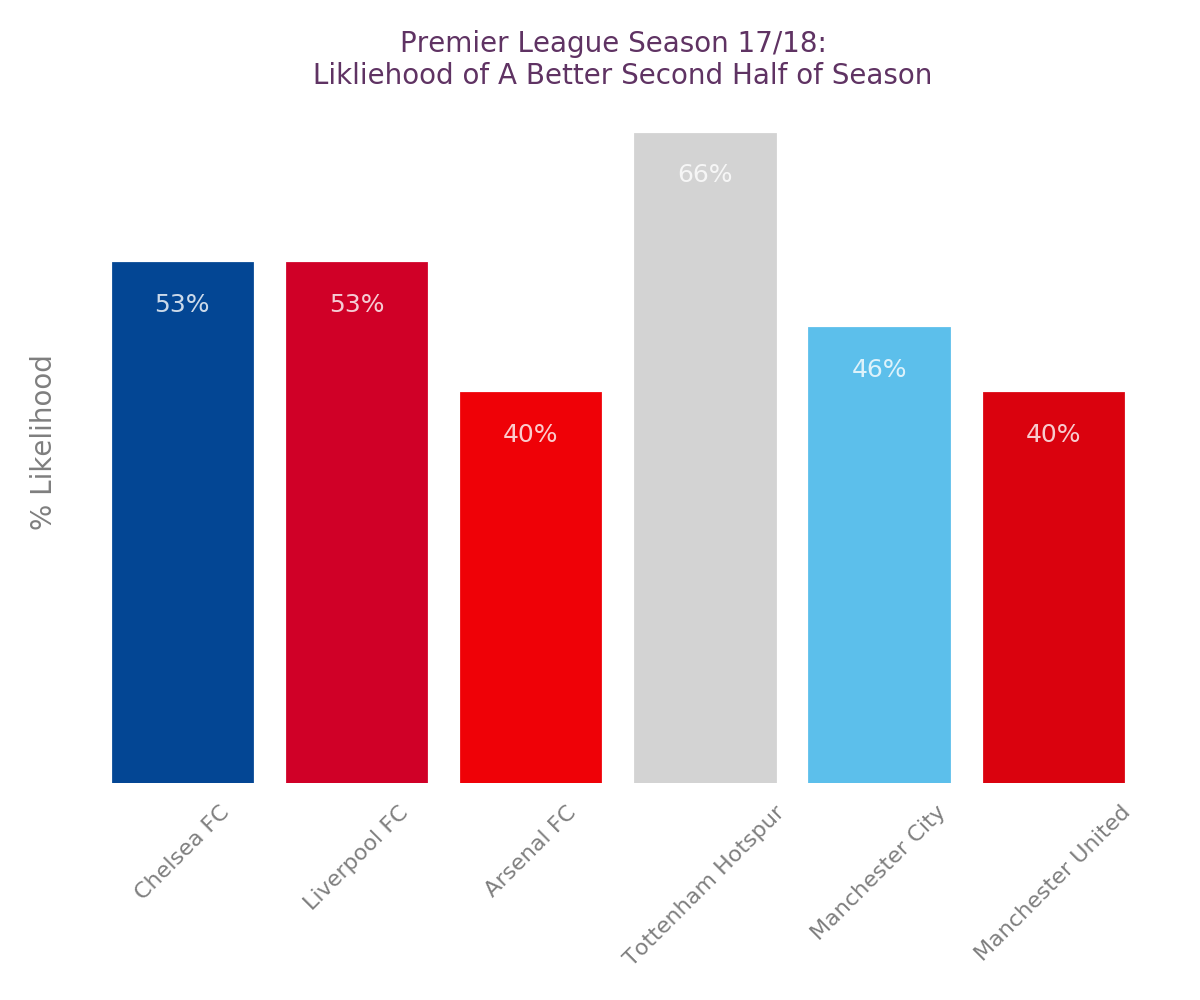

In [16]:
#initiate plot
plt.figure(figsize=(6,5))
bars = percentages_df.plot(kind='bar', align='center', linewidth=1, color='lightslategrey',width=0.8)

In [17]:
#removing ticks/labels
plt.tick_params(top='off',bottom='off',left='off',labelleft='off', labelbottom='on')

In [19]:
#removing spines/frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [20]:
#Adding xticks w/ a rotation 
pos = np.arange(len(team_list))
plt.xticks(pos,team_list,alpha=0.5,rotation = '45', fontsize=8)

([<matplotlib.axis.XTick at 0x118d61c88>,
 <a list of 6 Text xticklabel objects>)

In [21]:
#Title
plt.title('Premier League Season 17/18: \n Likliehood of A Better Second Half of Season',
          fontsize=10,alpha=0.8,color='#38003c')

In [22]:
#adding ylabels on bars
my_bars = bars.get_children()[:6]
for bar in my_bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=9,alpha=0.8)

In [23]:
team_list

['Chelsea FC',
 'Liverpool FC',
 'Arsenal FC',
 'Tottenham Hotspur',
 'Manchester City',
 'Manchester United']

In [24]:
#team colors
color_codes = ['#034694','#D00027','#EF0107','lightgrey','#5CBFEB','#DA020E'] 

In [25]:
#matching team bars with their color
for bar,color in zip(my_bars,color_codes):
    bar.set_color(color)

In [26]:
#adding ylabel
plt.ylabel('% Likelihood',alpha = 0.5, fontsize=10)

In [27]:
#fixing layout issues
plt.tight_layout()